In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/Sample - Superstore.csv', encoding='ISO-8859-1')


In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [5]:
df.shape

(9994, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [7]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
df['Order Date']=pd.to_datetime(df['Order Date'])

In [11]:
df['Order Date'].dtype

dtype('<M8[ns]')

In [12]:
df['Ship Date']=pd.to_datetime(df['Ship Date'])

In [13]:
df['Order Month']=df['Order Date'].dt.month

In [14]:
df['Order Week'] = df['Order Date'].dt.dayofweek

In [15]:
df['Order Year']=df['Order Date'].dt.month

In [16]:
df['Order Week']

,Order Week
0,1
1,1
2,6
3,6
4,6
...,...
9989,1
9990,6
9991,6
9992,6


In [17]:
#monthly sales analysis
monthly_sales=df.groupby('Order Month')['Sales'].sum().reset_index()


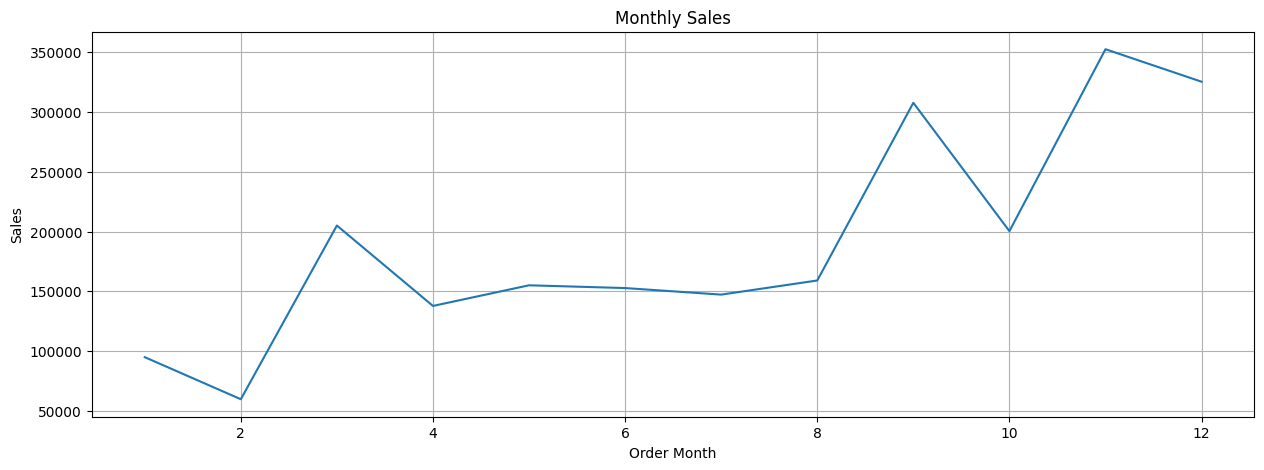

In [18]:
plt.figure(figsize=(15, 5))  # set the figure size first
Sales_by_Month = sns.lineplot(data=monthly_sales, x='Order Month', y='Sales')
plt.title('Monthly Sales')
plt.grid(True)
plt.show()


In [19]:
monthly_sales


,Order Month,Sales
0,1,94924.8356
1,2,59751.2514
2,3,205005.4888
3,4,137762.1286
4,5,155028.8117
5,6,152718.6793
6,7,147238.0970
7,8,159044.0630
8,9,307649.9457
9,10,200322.9847


In [20]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Order Month', 'Order Week', 'Order Year'],
      dtype='object')

In [21]:
cat_sales=df.groupby('Category')['Sales'].sum().reset_index()
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Order Month', 'Order Week', 'Order Year'],
      dtype='object')

In [22]:
cat_sales

,Category,Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


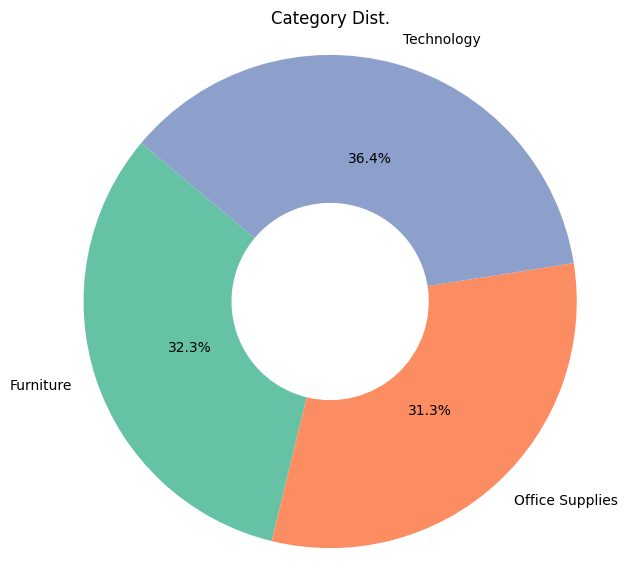

In [23]:
import matplotlib.pyplot as plt

Categorylist = ['Furniture', 'Office Supplies', 'Technology']
sales = [741999.7953, 719047.0320, 836154.0330]

colors = plt.get_cmap('Set2').colors[:3]  # Grab 3 colors from Set2 colormap

plt.figure(figsize=(7, 7))
plt.pie(sales, labels=Categorylist, autopct='%1.1f%%', colors=colors, startangle=140,wedgeprops={'width': 0.6} )
plt.title('Category Dist.')
plt.axis('equal')
plt.show()


In [24]:
# sales by Sub category
df['Sub-Category']


,Sub-Category
0,Bookcases
1,Chairs
2,Labels
3,Tables
4,Storage
...,...
9989,Furnishings
9990,Furnishings
9991,Phones
9992,Paper


In [25]:
sales_by_Sub_cat=df.groupby('Sub-Category')['Sales'].sum().reset_index()
sales_by_Sub_cat

,Sub-Category,Sales
0,Accessories,167380.3180
1,Appliances,107532.1610
2,Art,27118.7920
3,Binders,203412.7330
4,Bookcases,114879.9963
5,Chairs,328449.1030
6,Copiers,149528.0300
7,Envelopes,16476.4020
8,Fasteners,3024.2800
9,Furnishings,91705.1640


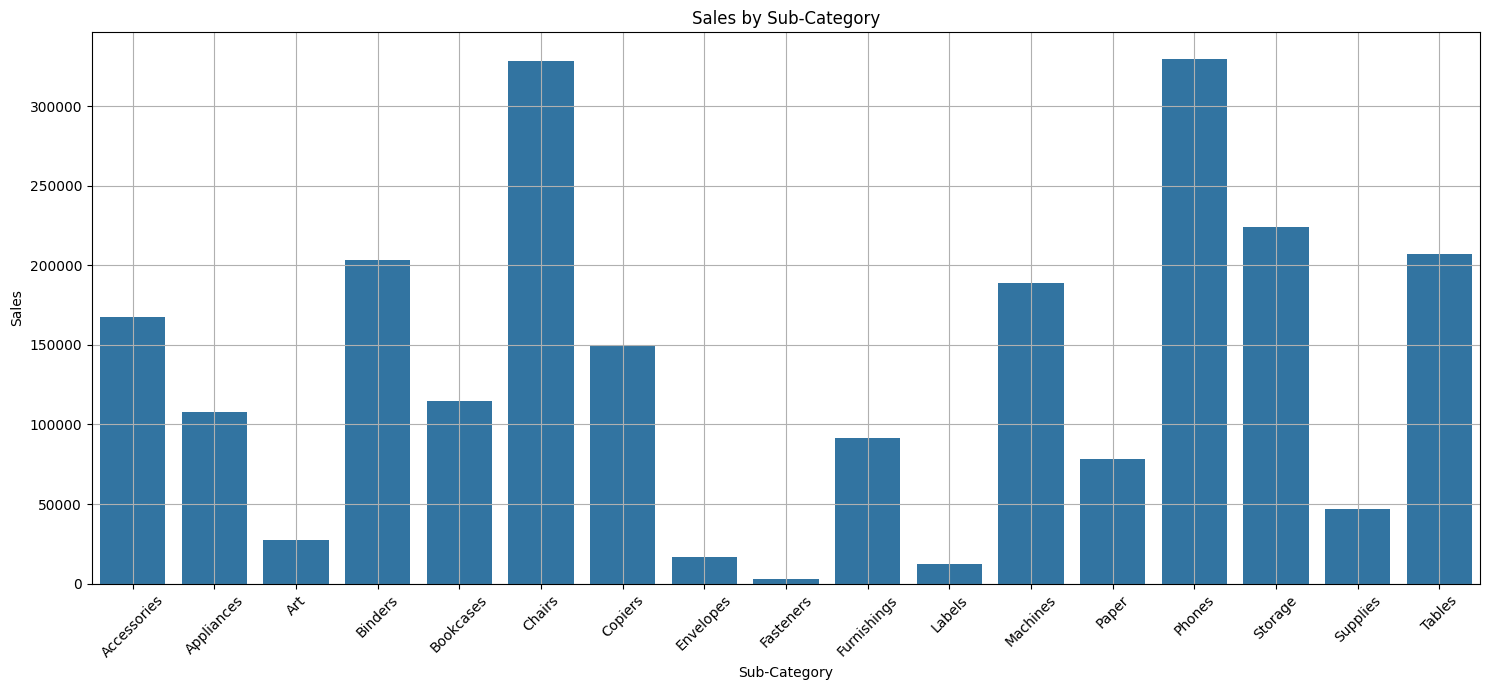

In [26]:
plt.figure(figsize=(15, 7))  # ✅ call this BEFORE plotting

sns.barplot(data=sales_by_Sub_cat, x='Sub-Category', y='Sales')

plt.title('Sales by Sub-Category')
plt.xticks(rotation=45)     # ✅ rotate x-axis labels, not y
plt.grid(True)
plt.tight_layout()
plt.show()


In [27]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Order Month', 'Order Week', 'Order Year'],
      dtype='object')

In [34]:
df['Profit'].dtype

dtype('float64')

In [29]:
pro_monthly=df.groupby('Order Month')['Profit'].sum().reset_index()

In [33]:
pro_monthly
df['Order Month'].dtype

dtype('int32')

/tmp/ipython-input-1160094818.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pro_monthly, y='Profit', x='Order Month', palette='Set2')


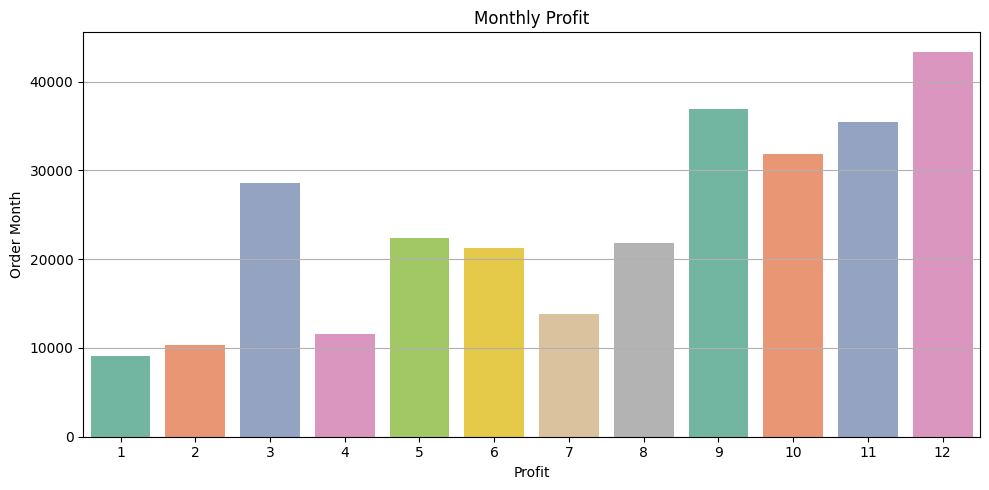

In [51]:
plt.figure(figsize=(10, 5))
plt.grid()
plt.title("Monthly Profit")
sns.barplot(data=pro_monthly, y='Profit', x='Order Month', palette='Set2')
plt.tight_layout()
plt.xlabel('Profit')
plt.ylabel('Order Month')
plt.show()


In [52]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Order Month', 'Order Week', 'Order Year'],
      dtype='object')

In [53]:
# Profit by Category
pro_cat=df.groupby('Category')['Profit'].sum().reset_index()
pro_cat

,Category,Profit
0,Furniture,18451.2728
1,Office Supplies,122490.8008
2,Technology,145454.9481


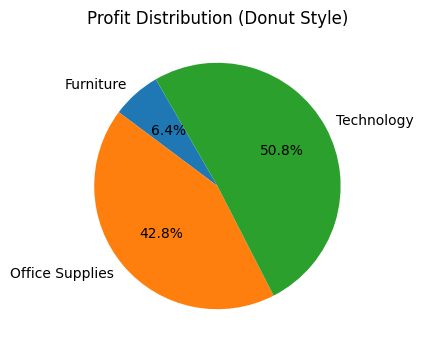

In [61]:
import matplotlib.pyplot as plt

labels = ['Furniture', 'Office Supplies', 'Technology']
Profit = [18451.2728, 122490.8008, 145454.9481]


plt.figure(figsize=(4, 4))
plt.pie(Profit, labels=labels, autopct='%1.1f%%', startangle=120)
plt.title('Profit Distribution (Donut Style)')
plt.show()



In [62]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Order Month', 'Order Week', 'Order Year'],
      dtype='object')

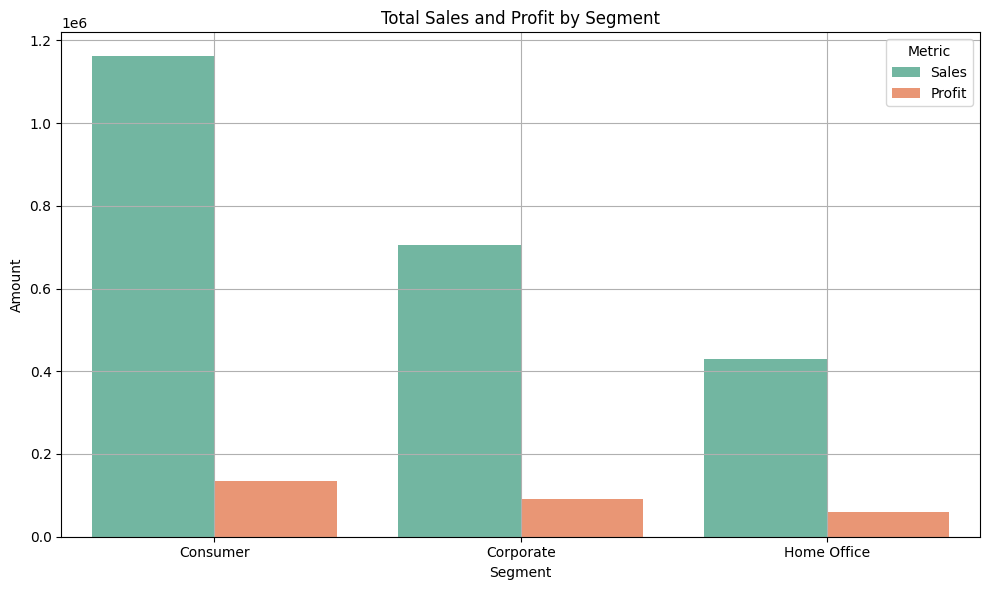

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure the DataFrame is ready
# les_pro_by_seg = df.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

plt.figure(figsize=(10, 6))
les_pro_by_seg_melted = les_pro_by_seg.melt(id_vars='Segment', value_vars=['Sales', 'Profit'], var_name='Metric', value_name='Amount')

sns.barplot(data=les_pro_by_seg_melted, x='Segment', y='Amount', hue='Metric', palette='Set2')

plt.title('Total Sales and Profit by Segment')
plt.grid(True)
plt.tight_layout()
plt.show()


In [63]:
df['Segment']

,Segment
0,Consumer
1,Consumer
2,Corporate
3,Consumer
4,Consumer
...,...
9989,Consumer
9990,Consumer
9991,Consumer
9992,Consumer


In [69]:
les_pro_by_seg['Sales_to_Profit_Ratio'] = les_pro_by_seg['Sales'] / les_pro_by_seg['Profit']


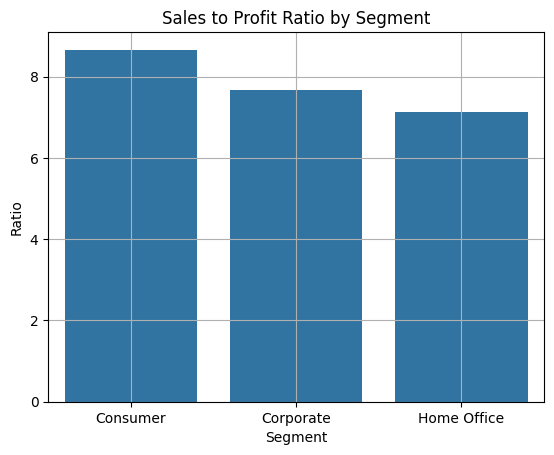

In [70]:
sns.barplot(data=les_pro_by_seg, x='Segment', y='Sales_to_Profit_Ratio')
plt.title('Sales to Profit Ratio by Segment')
plt.ylabel('Ratio')
plt.grid(True)
plt.show()
